In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.segmentation import watershed
from watershed import watershed_g, watershed_gt

In [ ]:
def plot_graph(graph, labels, values):
    # each node will be colored using a colormap of blues based on vals
    # labels will be applied to each node

    # create a color map
    values = -values
    cmap = plt.get_cmap('Blues', 256)
    norm = colors.Normalize(vmin=min(values), vmax=max(values))
    col= [cmap(norm(val)) for val in values]

    # create a layout for the nodes
    pos = nx.spring_layout(graph, seed=42)
    
    # create the labels dictionary
    labels_dict = {node: str(label) for node, label in zip(graph.nodes, labels)}

    # draw the graph
    nx.draw_networkx(graph, pos, node_color=col, with_labels=True,
                     labels=labels_dict, node_size=700, font_size=10,
                     font_color='black', edge_color='gray', alpha=0.7)
    
def test_ws_seg(graph, val_list):
    G = nx.from_numpy_array(graph)
    for val in val_list:
        lbls = watershed_g(graph, val)
        print("Graph values:", val)
        print("Graph labels:", lbls)
        fig = plt.figure()
        plot_graph(G, lbls, val)

# Line graph test

In [3]:
graph_line = np.array([[0, 1, 0, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0],
                       [0, 1, 0, 1, 0, 0],
                       [0, 0, 1, 0, 1, 0],
                       [0, 0, 0, 1, 0, 1],
                       [0, 0, 0, 0, 1, 0]])

Line graph values: [-1 -1 -1 -1  0  0]
Line graph labels: [1 1 1 1 1 1]
Line graph values: [-1 -2 -1  0 -1 -2]
Line graph labels: [1 1 1 1 2 2]
Line graph values: [-1  0 -1  0 -1  0]
Line graph labels: [1 1 2 2 3 3]
Line graph values: [-1 -2 -3 -2 -1  0]
Line graph labels: [1 1 1 1 1 1]
Line graph values: [ 3  2  1  0 -1 -2]
Line graph labels: [1 1 1 1 1 1]


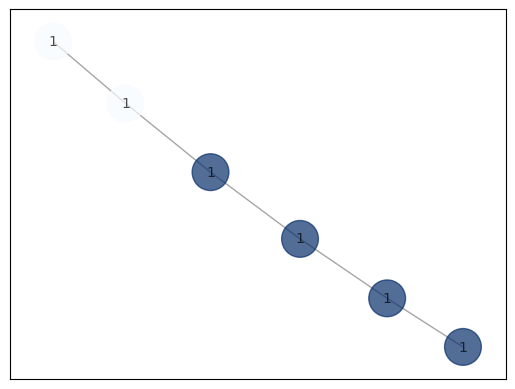

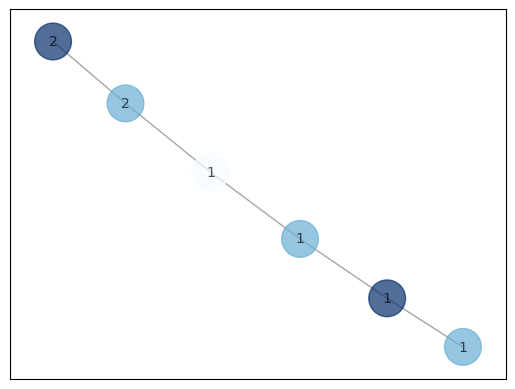

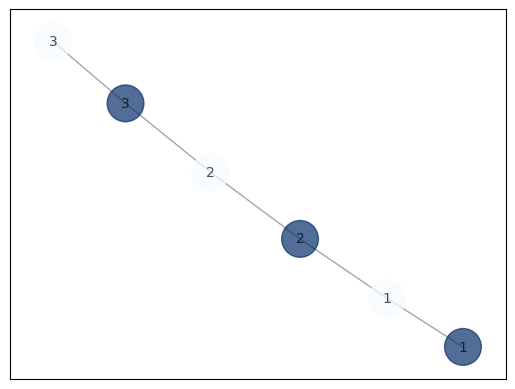

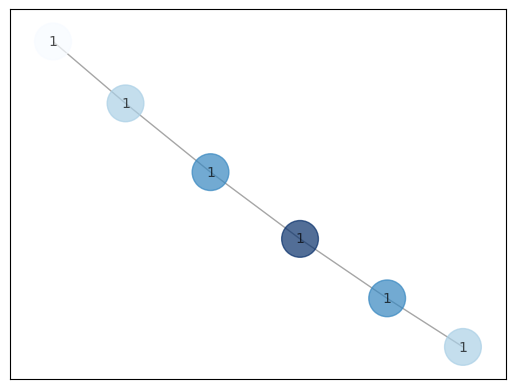

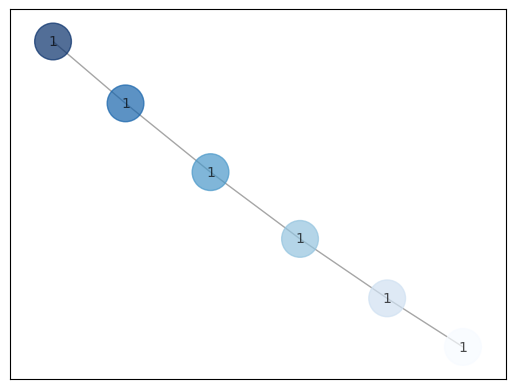

In [4]:
node_vals = []
node_vals.append(-np.array([1, 1, 1, 1, 0, 0]))
node_vals.append(-np.array([1, 2, 1, 0, 1, 2]))
node_vals.append(-np.array([1, 0, 1, 0, 1, 0]))
node_vals.append(-np.array([1, 2, 3, 2, 1, 0]))
node_vals.append(-np.array([-3, -2, -1, 0, 1, 2]))

test_ws_seg(graph_line, node_vals)

# Circular graph test

In [5]:
graph_circ = np.array([[0, 1, 0, 0, 0, 1],
                       [1, 0, 1, 0, 0, 0],
                       [0, 1, 0, 1, 0, 0],
                       [0, 0, 1, 0, 1, 0],
                       [0, 0, 0, 1, 0, 1],
                       [1, 0, 0, 0, 1, 0]])

Line graph values: [-1 -2 -3 -2 -1  0]
Line graph labels: [1 1 1 1 1 1]
Line graph values: [-1  0 -1  0 -1  0]
Line graph labels: [1 1 2 2 3 1]
Line graph values: [-1 -1 -1 -1  0  0]
Line graph labels: [1 1 1 1 1 1]
Line graph values: [-1 -2 -1  0 -1 -2]
Line graph labels: [1 1 1 1 2 2]


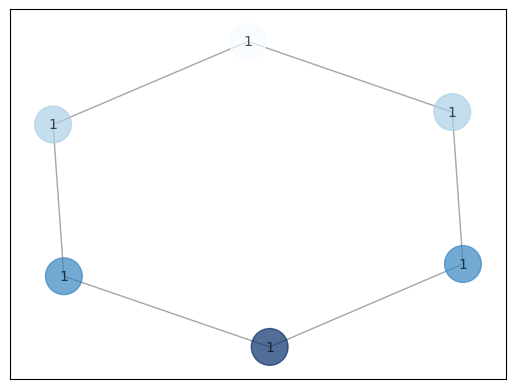

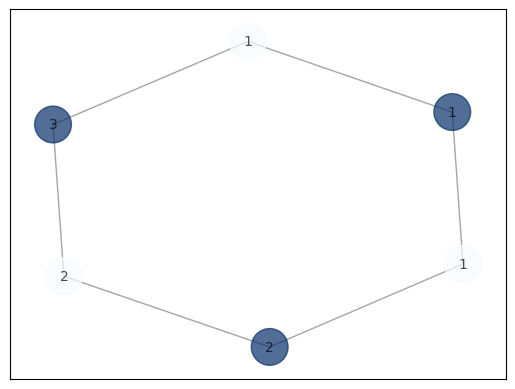

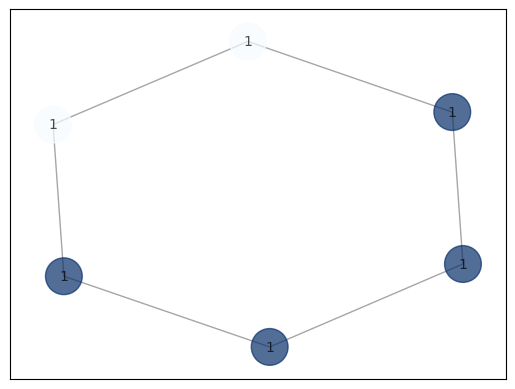

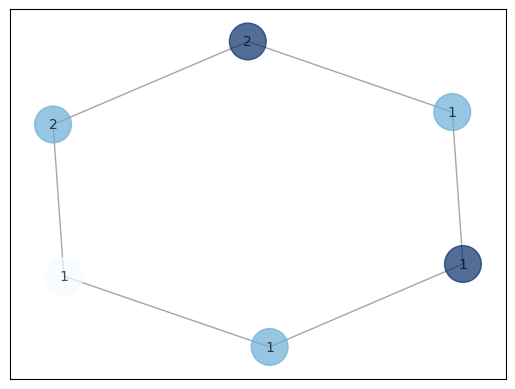

In [6]:
node_vals = []
node_vals.append(-np.array([1, 2, 3, 2, 1, 0]))
node_vals.append(-np.array([1, 0, 1, 0, 1, 0]))
node_vals.append(-np.array([1, 1, 1, 1, 0, 0]))
node_vals.append(-np.array([1, 2, 1, 0, 1, 2]))

test_ws_seg(graph_circ, node_vals)

# Tree graph test

In [7]:
graph_tree = np.zeros((9,9))
graph_tree[0,1] = 1; graph_tree[1,0] = 1
graph_tree[0,2] = 1; graph_tree[2,0] = 1
graph_tree[1,3] = 1; graph_tree[3,1] = 1
graph_tree[2,4] = 1; graph_tree[4,2] = 1
graph_tree[3,5] = 1; graph_tree[5,3] = 1
graph_tree[3,6] = 1; graph_tree[6,3] = 1
graph_tree[4,7] = 1; graph_tree[7,4] = 1
graph_tree[4,8] = 1; graph_tree[8,4] = 1

Line graph values: [ 0  0 -1  0 -2  0  0 -1 -3]
Line graph labels: [1 1 1 1 1 1 1 1 1]
Line graph values: [-9 -8 -7 -6 -5 -4 -3 -2 -1]
Line graph labels: [1 1 1 1 1 1 1 1 1]
Line graph values: [-1 -2 -3 -4 -5 -6 -7 -8 -9]
Line graph labels: [1 3 1 3 1 4 3 2 1]


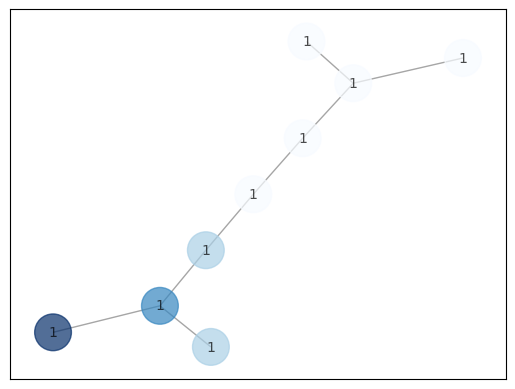

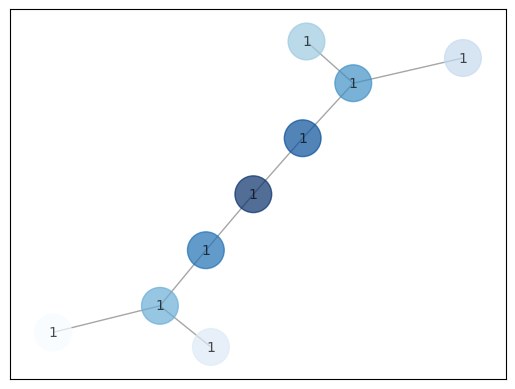

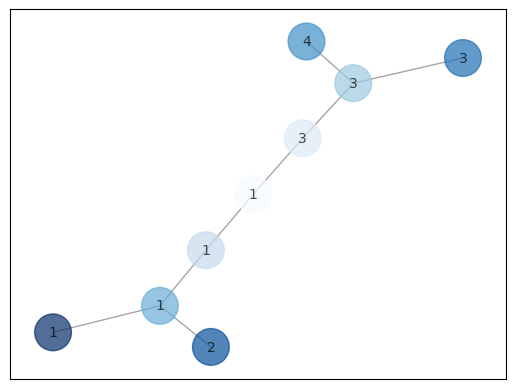

In [8]:
node_vals = []
node_vals.append(-np.array([0, 0, 1, 0, 2, 0, 0, 1, 3]))
node_vals.append(-np.array([9, 8, 7, 6, 5, 4, 3, 2, 1]))
node_vals.append(-np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

test_ws_seg(graph_tree, node_vals)

# Grid graph test

In [9]:
# an undirected graph of a 6x6 grid of nodes
graph_grid = np.zeros((36,36))
for i in range(6):
    for j in range(6):
        if i < 5:
            graph_grid[i*6+j, (i+1)*6+j] = 1
            graph_grid[(i+1)*6+j, i*6+j] = 1
        if j < 5:
            graph_grid[i*6+j, i*6+j+1] = 1
            graph_grid[i*6+j+1, i*6+j] = 1

Line graph values: [ -1  -2  -3  -4  -5  -6  -2  -3  -4  -5  -6  -7  -3  -4  -5  -6  -7  -8
  -4  -5  -6  -7  -8  -9  -5  -6  -7  -8  -9 -10  -6  -7  -8  -9 -10 -11]
Line graph labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Line graph values: [ 0 -1 -2 -1  0  0 -1 -2 -3 -2 -1  0 -2 -3 -4 -3 -2 -1 -2 -3 -4 -3 -2 -1
 -1 -2 -3 -2 -1  0  0 -1 -2 -1  0  0]
Line graph labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Line graph values: [-4 -3 -2 -1  0  0 -3 -2 -1  0  0  0 -2 -1  0  0  0 -1 -1  0  0  0 -1 -2
  0  0  0 -1 -2 -3  0  0 -1 -2 -3 -4]
Line graph labels: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2]


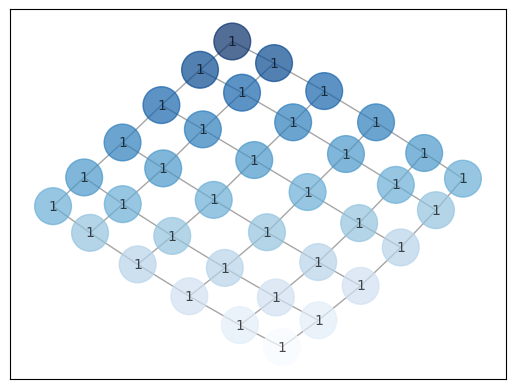

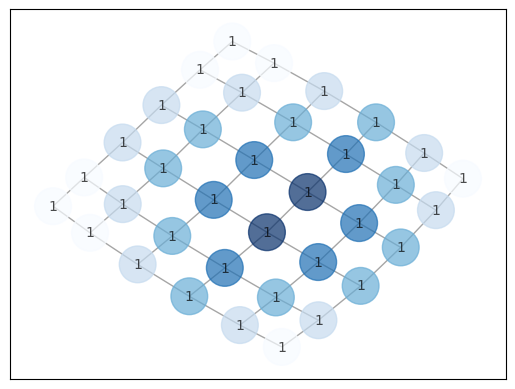

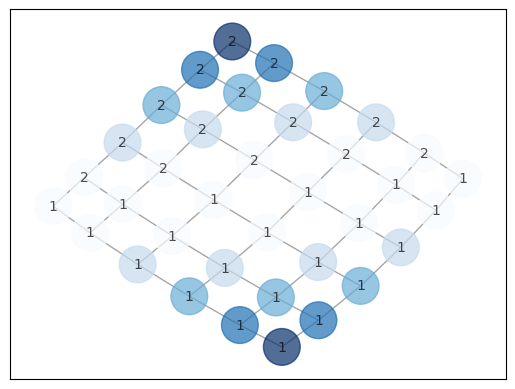

In [10]:
node_vals = []
node_vals.append(-np.array([1, 2, 3, 4, 5, 6,
                            2, 3, 4, 5, 6, 7,
                            3, 4, 5, 6, 7, 8,
                            4, 5, 6, 7, 8, 9,
                            5, 6, 7, 8, 9,10,
                            6, 7, 8, 9,10,11]))
node_vals.append(-np.array([0, 1, 2, 1, 0, 0,
                           1, 2, 3, 2, 1, 0,
                           2, 3, 4, 3, 2, 1,
                           2, 3, 4, 3, 2, 1,
                           1, 2, 3, 2, 1, 0,
                           0, 1, 2, 1, 0, 0]))
node_vals.append(-np.array([4, 3, 2, 1, 0, 0,
                            3, 2, 1, 0, 0, 0,
                            2, 1, 0, 0, 0, 1,
                            1, 0, 0, 0, 1, 2,
                            0, 0, 0, 1, 2, 3,
                            0, 0, 1, 2, 3, 4]))

test_ws_seg(graph_grid, node_vals)                       

# Test the temporal line graph

In [11]:
def interpmv(x, xi, yi):
    """
    Interpolate the values of yi at the points xi to the points x.


    Parameters
    ----------
    x : array-like, shape (n)
        The points at which to interpolate the values.
    xi : array-like, shape (n, m)
        The points at which the values are known.
    yi : array-like, shape (n, m)
        The values at the points xi.
    Returns
    -------
    y : array-like
        The interpolated values at the points x.
    """

    y = np.zeros((x.size, yi.shape[1]))
    for i in range(yi.shape[1]):
        y[:, i] = np.interp(x, xi, yi[:, i])
    
    return y

def graph_flow(graph, val_list):
    """
    Flow the values of the graph along its edges.

    Parameters
    ----------
    graph : array-like, shape (n, n)
        The graph to flow the values along.
    val_list : list of array-like, shape (n)
        The values to flow along the graph.
    Returns
    -------
    y : array-like, shape (n, m)
        The flowed values at the points x.
    """
    y = np.zeros(val_list.shape)
    graph_n = graph/np.sum(graph, axis=1)
    y[0,:] = val_list[0, :]
    for i in range(1,val_list.shape[0]):
        y[i,:] = y[i-1,:]@graph_n + val_list[i,:]
    return y

def test_ws_seg_temporal(graph, val_list):
    G = nx.from_numpy_array(graph)
    for val in val_list:
        lbls = watershed_gt(graph, val)
        print("Line graph values:", val)
        print("Line graph labels:", lbls)
        fig = plt.figure()
        # plot an image of val with text labels over each pixel
        plt.imshow(val, cmap='Blues', interpolation='nearest')
        for i in range(val.shape[0]):
            for j in range(val.shape[1]):
                plt.text(j, i, str(lbls[i, j]), ha='center', va='center', color='black')

Line graph values: [[-3.  -2.  -1.  -0.  -0.  -0. ]
 [-2.4 -1.6 -0.8 -0.  -0.  -0. ]
 [-1.8 -1.2 -0.6 -0.  -0.  -0. ]
 [-1.2 -0.8 -0.4 -0.  -0.  -0. ]
 [-0.6 -0.4 -0.2 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]]
Line graph labels: [[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
Line graph values: [[-3.  -2.4 -1.8 -1.2 -0.6 -0. ]
 [-2.  -1.6 -1.2 -0.8 -0.4 -0. ]
 [-1.  -0.8 -0.6 -0.4 -0.2 -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]]
Line graph labels: [[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
Line graph values: [[-3.  -2.  -1.  -0.  -0.  -0. ]
 [-2.4 -1.6 -0.8 -0.2 -0.4 -0.6]
 [-1.8 -1.2 -0.6 -0.4 -0.8 -1.2]
 [-1.2 -0.8 -0.4 -0.6 -1.2 -1.8]
 [-0.6 -0.4 -0.2 -0.8 -1.6 -2.4]
 [-0.  -0.  -0.  -1.  -2.  -3. ]]
Line graph labels: [[1 1 1 1 2 2]
 [1 1 1 1 2 2]
 [1 1 1 2 2 2]
 [1 1 1 2 2 2]
 [1 1 2 2 2 2]
 [1 1 2 2 2 2]]
Line graph value

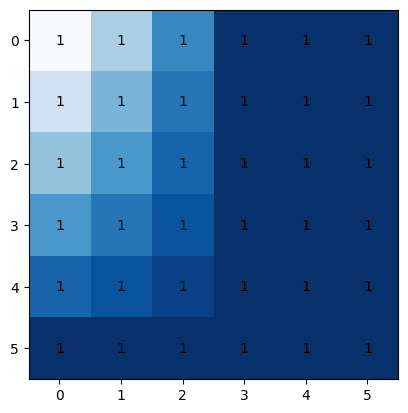

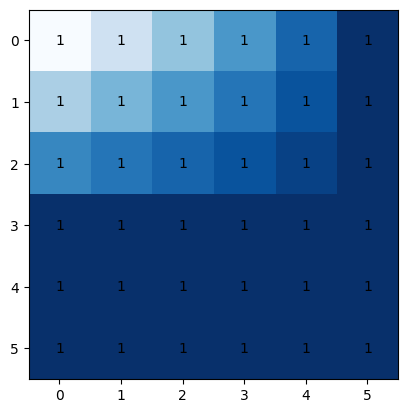

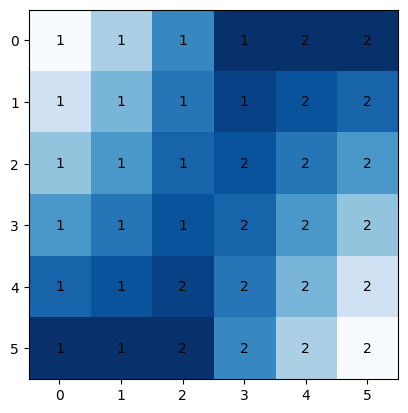

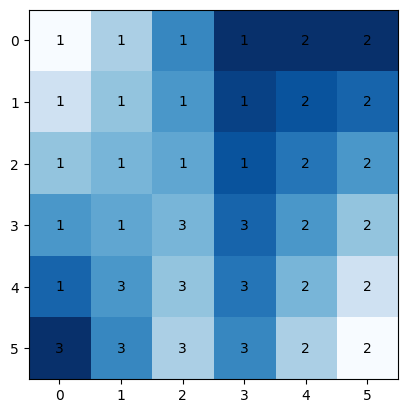

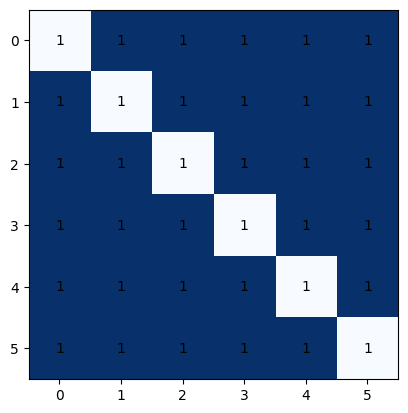

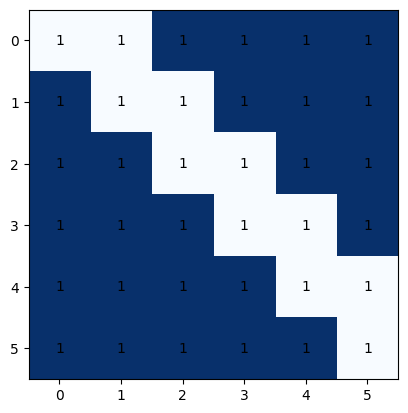

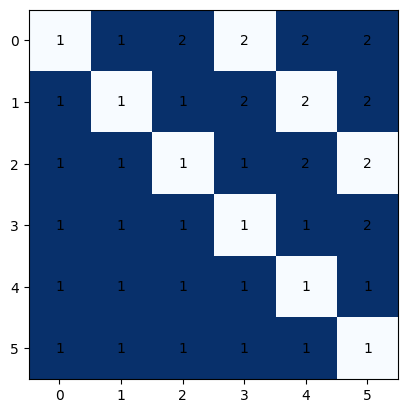

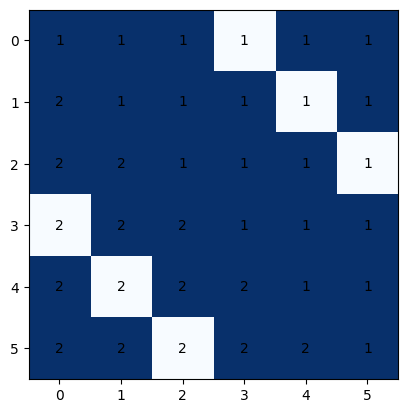

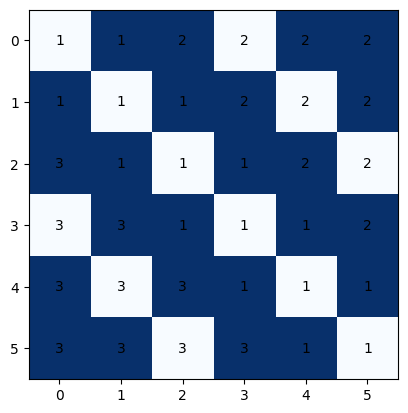

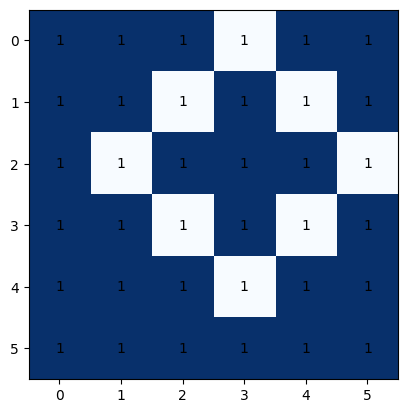

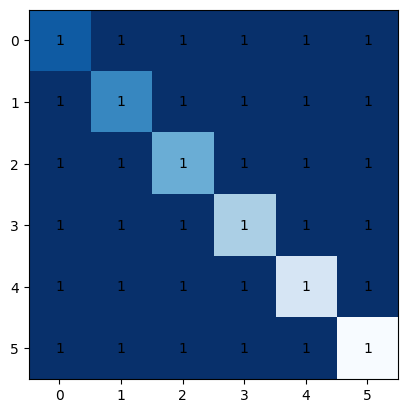

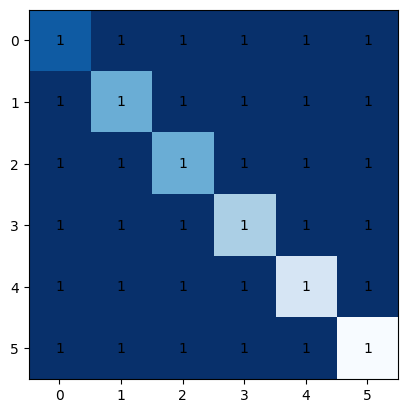

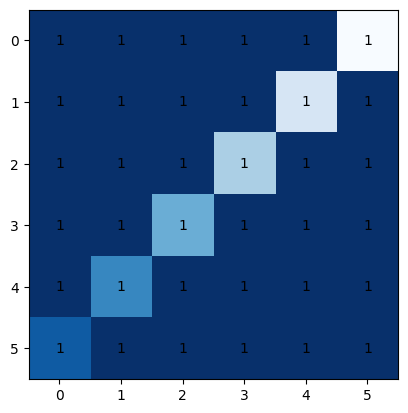

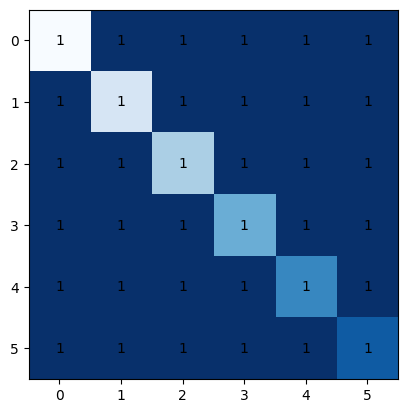

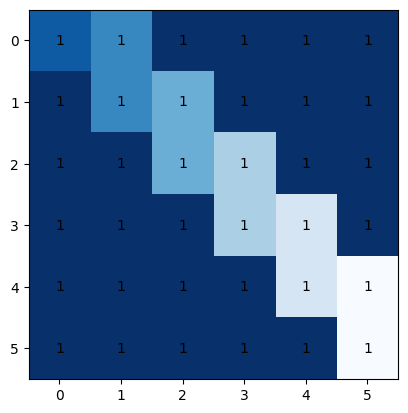

In [12]:
# Test the temporal line graph

node_vals = []
#node_vals.append(-np.ones((6, 6))); node_vals[0][3, 3] = -2; node_vals[0][1, 4] = -3
node_vals.append(-interpmv(np.arange(6), [0, 5], 
                           np.array([[3, 2, 1, 0, 0, 0],
                                     [0, 0, 0, 0, 0, 0]])))
node_vals.append(-interpmv(np.arange(6), [0, 5], 
                           np.array([[3, 2, 1, 0, 0, 0],
                                     [0, 0, 0, 0, 0, 0]])).T)
node_vals.append(-interpmv(np.arange(6), [0, 5], 
                           np.array([[3, 2, 1, 0, 0, 0],
                                     [0, 0, 0, 1, 2, 3]])))
node_vals.append(-interpmv(np.arange(6), [0, 5],
                            np.array([[3, 2, 1, 0, 0, 0],
                                      [0, 1, 2, 1, 2, 3]])))
node_vals.append(-np.eye(6))
node_vals.append(-np.eye(6) + -np.eye(6, k=1))
node_vals.append(-np.eye(6) + -np.eye(6, k=3))
node_vals.append(-np.eye(6,k=-3) + -np.eye(6, k=3))
node_vals.append(-np.eye(6,k=-3) + -np.eye(6, k=3) + -np.eye(6))
node_vals.append(-np.array([[0, 0, 0, 1, 0, 0],
                            [0, 0, 1, 0, 1, 0],
                            [0, 1, 0, 0, 0, 1],
                            [0, 0, 1, 0, 1, 0],
                            [0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 0]]))
node_vals.append(-np.array([[1, 0, 0, 0, 0, 0],
                            [0, 2, 0, 0, 0, 0],
                            [0, 0, 3, 0, 0, 0],
                            [0, 0, 0, 4, 0, 0],
                            [0, 0, 0, 0, 5, 0],
                            [0, 0, 0, 0, 0, 6]]))
node_vals.append(-np.array([[1, 0, 0, 0, 0, 0],
                            [0, 2, 0, 0, 0, 0],
                            [0, 0, 3, 0, 0, 0],
                            [0, 0, 0, 4, 0, 0],
                            [0, 0, 0, 0, 5, 0],
                            [0, 0, 0, 0, 0, 6]])); node_vals[-1][1,1] = -3
node_vals.append(np.rot90(-np.array([[1, 0, 0, 0, 0, 0],
                            [0, 2, 0, 0, 0, 0],
                            [0, 0, 3, 0, 0, 0],
                            [0, 0, 0, 4, 0, 0],
                            [0, 0, 0, 0, 5, 0],
                            [0, 0, 0, 0, 0, 6]])))
node_vals.append(-np.array([[6, 0, 0, 0, 0, 0],
                            [0, 5, 0, 0, 0, 0],
                            [0, 0, 4, 0, 0, 0],
                            [0, 0, 0, 3, 0, 0],
                            [0, 0, 0, 0, 2, 0],
                            [0, 0, 0, 0, 0, 1]]))
node_vals.append(-np.array([[1, 2, 0, 0, 0, 0],
                            [0, 2, 3, 0, 0, 0],
                            [0, 0, 3, 4, 0, 0],
                            [0, 0, 0, 4, 5, 0],
                            [0, 0, 0, 0, 5, 6],
                            [0, 0, 0, 0, 0, 6]]))
                           
test_ws_seg_temporal(graph_line, node_vals)

# Test the temporal circular graph

Line graph values: [[-3.  -2.  -1.  -0.  -0.  -0. ]
 [-2.4 -1.6 -0.8 -0.  -0.  -0. ]
 [-1.8 -1.2 -0.6 -0.  -0.  -0. ]
 [-1.2 -0.8 -0.4 -0.  -0.  -0. ]
 [-0.6 -0.4 -0.2 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]]
Line graph labels: [[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
Line graph values: [[-3.  -2.4 -1.8 -1.2 -0.6 -0. ]
 [-2.  -1.6 -1.2 -0.8 -0.4 -0. ]
 [-1.  -0.8 -0.6 -0.4 -0.2 -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.  -0. ]]
Line graph labels: [[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
Line graph values: [[-3.  -2.  -1.  -0.  -0.  -0. ]
 [-2.4 -1.6 -0.8 -0.2 -0.4 -0.6]
 [-1.8 -1.2 -0.6 -0.4 -0.8 -1.2]
 [-1.2 -0.8 -0.4 -0.6 -1.2 -1.8]
 [-0.6 -0.4 -0.2 -0.8 -1.6 -2.4]
 [-0.  -0.  -0.  -1.  -2.  -3. ]]
Line graph labels: [[1 1 1 1 2 1]
 [1 1 1 1 2 1]
 [1 1 1 2 2 1]
 [1 1 1 2 2 2]
 [2 1 2 2 2 2]
 [2 1 2 2 2 2]]
Line graph value

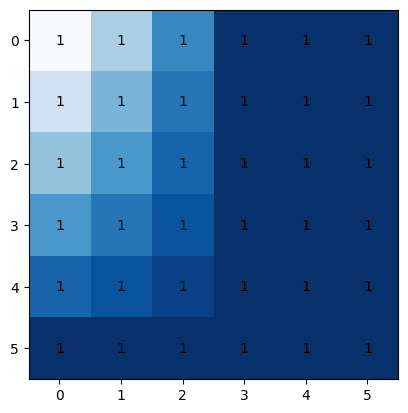

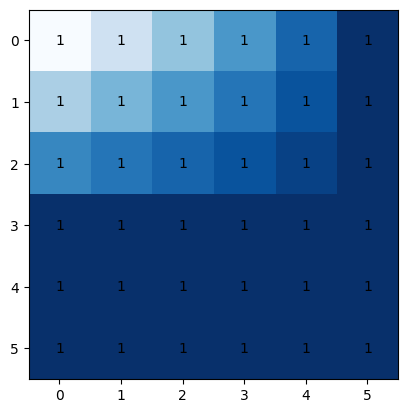

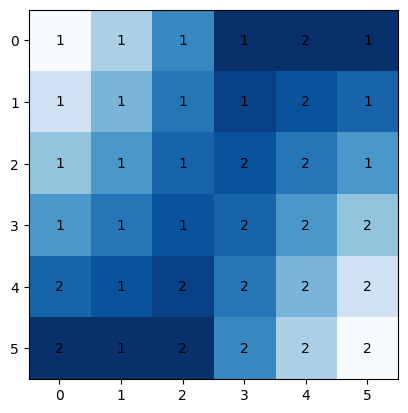

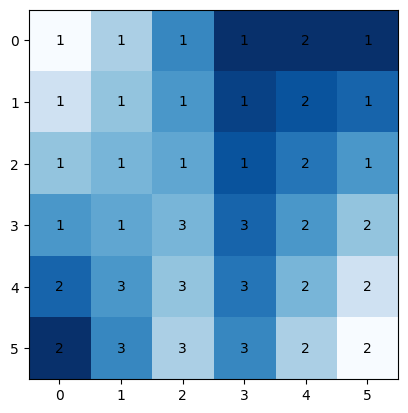

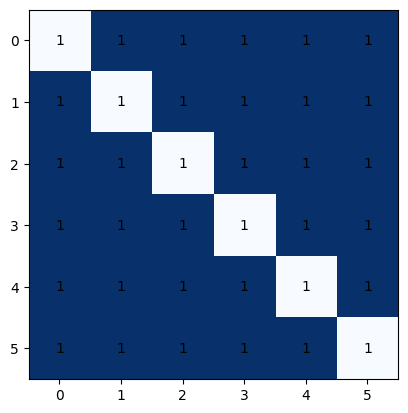

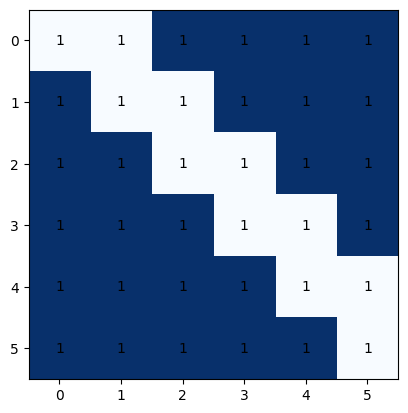

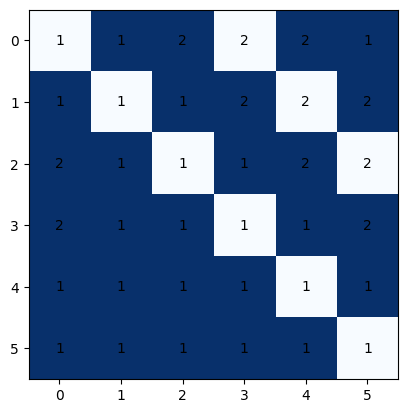

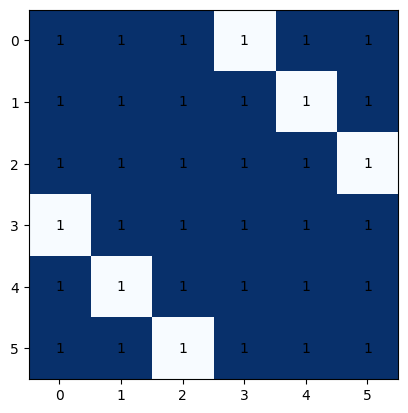

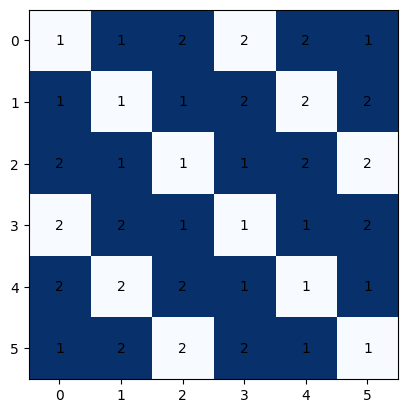

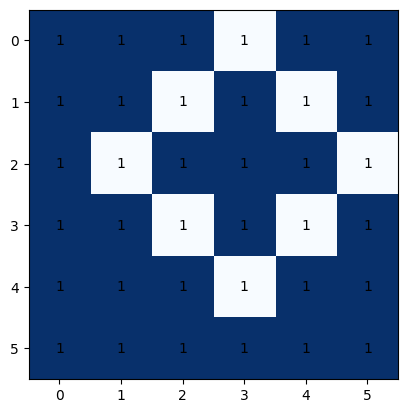

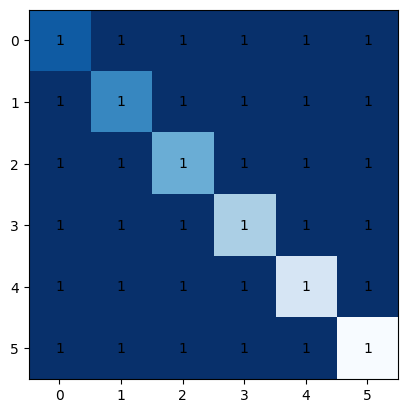

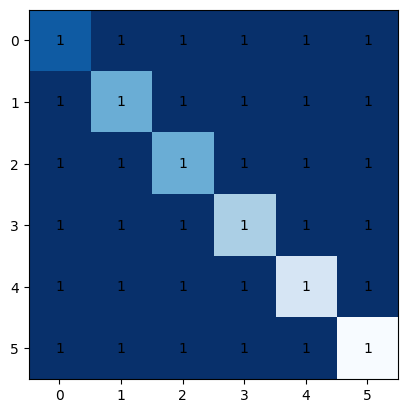

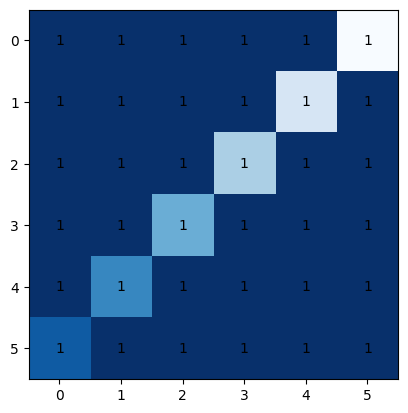

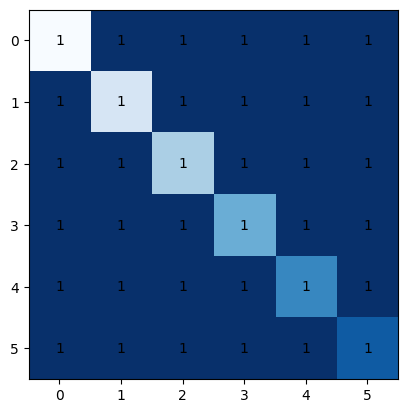

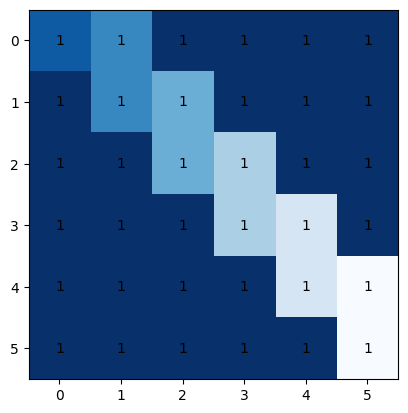

In [13]:
# Test the temporal circular graph

node_vals = []
#node_vals.append(-np.ones((6, 6))); node_vals[0][3, 3] = -2; node_vals[0][1, 4] = -3
node_vals.append(-interpmv(np.arange(6), [0, 5], 
                           np.array([[3, 2, 1, 0, 0, 0],
                                     [0, 0, 0, 0, 0, 0]])))
node_vals.append(-interpmv(np.arange(6), [0, 5], 
                           np.array([[3, 2, 1, 0, 0, 0],
                                     [0, 0, 0, 0, 0, 0]])).T)
node_vals.append(-interpmv(np.arange(6), [0, 5], 
                           np.array([[3, 2, 1, 0, 0, 0],
                                     [0, 0, 0, 1, 2, 3]])))
node_vals.append(-interpmv(np.arange(6), [0, 5],
                            np.array([[3, 2, 1, 0, 0, 0],
                                      [0, 1, 2, 1, 2, 3]])))
node_vals.append(-np.eye(6))
node_vals.append(-np.eye(6) + -np.eye(6, k=1))
node_vals.append(-np.eye(6) + -np.eye(6, k=3))
node_vals.append(-np.eye(6,k=-3) + -np.eye(6, k=3))
node_vals.append(-np.eye(6,k=-3) + -np.eye(6, k=3) + -np.eye(6))
node_vals.append(-np.array([[0, 0, 0, 1, 0, 0],
                            [0, 0, 1, 0, 1, 0],
                            [0, 1, 0, 0, 0, 1],
                            [0, 0, 1, 0, 1, 0],
                            [0, 0, 0, 1, 0, 0],
                            [0, 0, 0, 0, 0, 0]]))
node_vals.append(-np.array([[1, 0, 0, 0, 0, 0],
                            [0, 2, 0, 0, 0, 0],
                            [0, 0, 3, 0, 0, 0],
                            [0, 0, 0, 4, 0, 0],
                            [0, 0, 0, 0, 5, 0],
                            [0, 0, 0, 0, 0, 6]]))
node_vals.append(-np.array([[1, 0, 0, 0, 0, 0],
                            [0, 2, 0, 0, 0, 0],
                            [0, 0, 3, 0, 0, 0],
                            [0, 0, 0, 4, 0, 0],
                            [0, 0, 0, 0, 5, 0],
                            [0, 0, 0, 0, 0, 6]])); node_vals[-1][1,1] = -3
node_vals.append(np.rot90(-np.array([[1, 0, 0, 0, 0, 0],
                            [0, 2, 0, 0, 0, 0],
                            [0, 0, 3, 0, 0, 0],
                            [0, 0, 0, 4, 0, 0],
                            [0, 0, 0, 0, 5, 0],
                            [0, 0, 0, 0, 0, 6]])))
node_vals.append(-np.array([[6, 0, 0, 0, 0, 0],
                            [0, 5, 0, 0, 0, 0],
                            [0, 0, 4, 0, 0, 0],
                            [0, 0, 0, 3, 0, 0],
                            [0, 0, 0, 0, 2, 0],
                            [0, 0, 0, 0, 0, 1]]))
node_vals.append(-np.array([[1, 2, 0, 0, 0, 0],
                            [0, 2, 3, 0, 0, 0],
                            [0, 0, 3, 4, 0, 0],
                            [0, 0, 0, 4, 5, 0],
                            [0, 0, 0, 0, 5, 6],
                            [0, 0, 0, 0, 0, 6]]))
                           
test_ws_seg_temporal(graph_circ, node_vals)

# Test the temporal branched graph

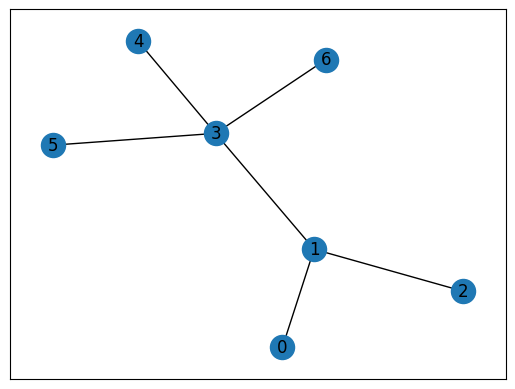

In [15]:
graph_branch = np.zeros((7,7))
graph_branch[0,1] = 1; graph_branch[1,0] = 1
graph_branch[1,2] = 1; graph_branch[2,1] = 1
graph_branch[1,3] = 1; graph_branch[3,1] = 1
graph_branch[3,4] = 1; graph_branch[4,3] = 1
graph_branch[3,5] = 1; graph_branch[5,3] = 1
graph_branch[3,6] = 1; graph_branch[6,3] = 1

G = nx.from_numpy_array(graph_branch)
nx.draw_networkx(G, with_labels=True)

Line graph values: [[-1.          0.          0.          0.          0.          0.
   0.        ]
 [-1.         -0.33333333  0.          0.          0.          0.
   0.        ]
 [-1.33333333 -0.33333333 -0.33333333 -0.08333333  0.          0.
   0.        ]
 [-1.33333333 -0.58333333 -0.33333333 -0.08333333 -0.08333333 -0.08333333
  -0.08333333]
 [-1.58333333 -0.58333333 -0.58333333 -0.20833333 -0.08333333 -0.08333333
  -0.08333333]
 [-1.58333333 -0.79166667 -0.58333333 -0.20833333 -0.20833333 -0.20833333
  -0.20833333]]
Line graph labels: [[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
Line graph values: [[ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]]
Line graph labels: [[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
Line graph values: [

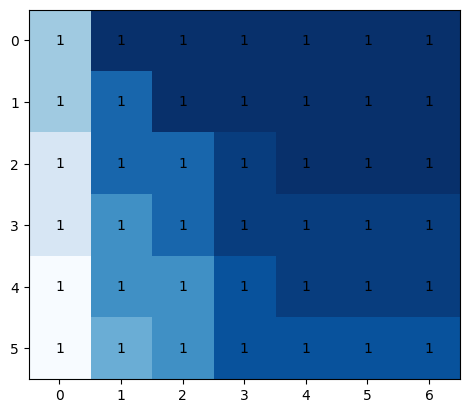

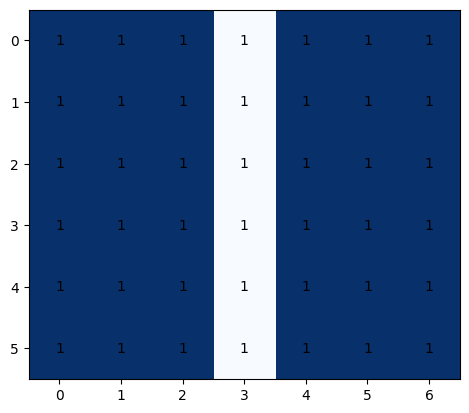

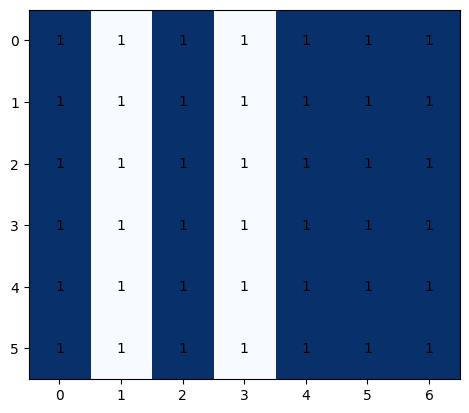

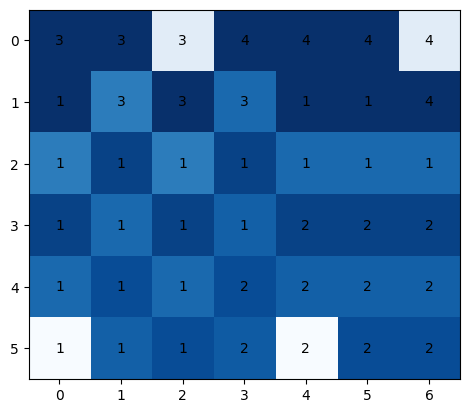

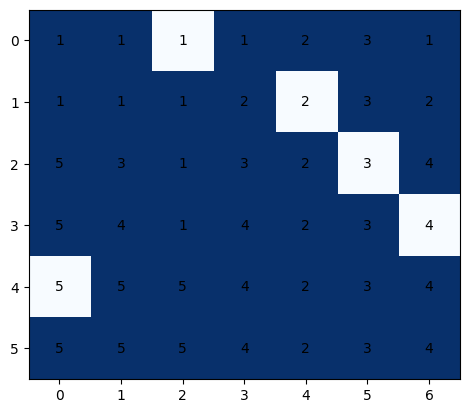

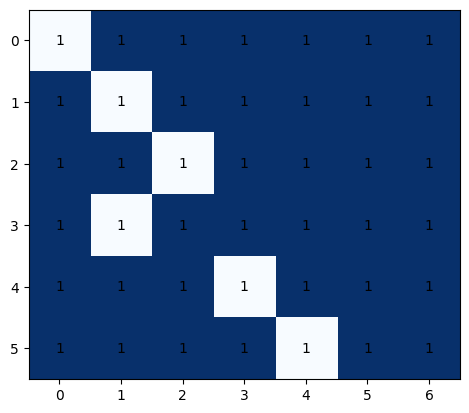

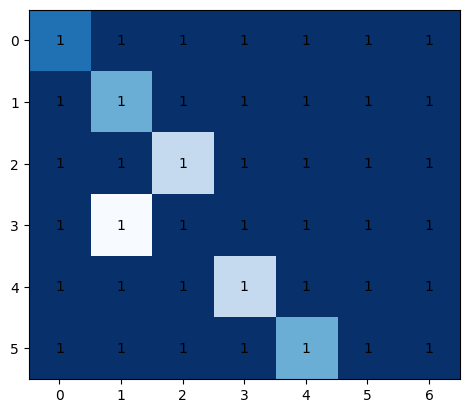

In [16]:
node_vals = []
# activate single node at binary branch
node_vals.append(np.zeros((6,7))); node_vals[-1][:, 0] = -1
node_vals[-1] = graph_flow(graph_branch, node_vals[-1])

# activate single node at trinary branch
node_vals.append(np.zeros((6,7))); node_vals[-1][:, 3] = -1

# activate two nodes that are in the center
node_vals.append(np.zeros((6,7))); node_vals[-1][:, [1, 3]] = -1

# activate two nodes at the edges, switching from one set to the other
node_vals.append(np.zeros((6,7))); node_vals[-1][0, [2, 6]] = -1
node_vals[-1][-1, [0, 4]] = -1
node_vals[-1] = graph_flow(graph_branch, node_vals[-1])

# activate each edge node one at a time
node_vals.append(np.zeros((6,7))); node_vals[-1][0, 2] = -1
node_vals[-1][1, 4] = -1; node_vals[-1][2, 5] = -1; node_vals[-1][3, 6] = -1
node_vals[-1][4, 0] = -1; 

# move an activation from one end of the tree to the other
node_vals.append(np.zeros((6,7))); node_vals[-1][0, 0] = -1
node_vals[-1][1, 1] = -1; node_vals[-1][2,2] = -1; node_vals[-1][3,1] = -1
node_vals[-1][4, 3] = -1; node_vals[-1][5, 4] = -1
#node_vals[-1] = graph_flow(graph_branch, node_vals[-1])

# move an activation from one end of the tree to the other, varying amplitude
node_vals.append(np.zeros((6,7))); node_vals[-1][0, 0] = -1
node_vals[-1][1, 1] = -2; node_vals[-1][2,2] = -3; node_vals[-1][3,1] = -4
node_vals[-1][4, 3] = -3; node_vals[-1][5, 4] = -2

test_ws_seg_temporal(graph_branch, node_vals)

# Test a disconnected temporal graph

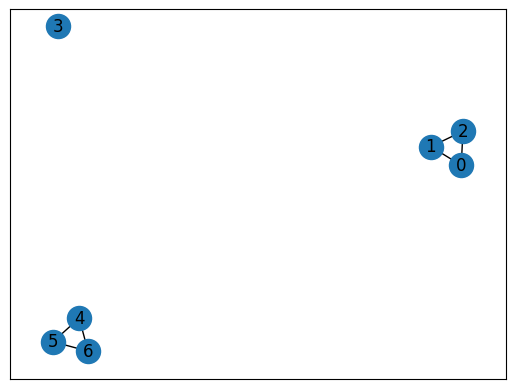

In [20]:
graph_disc = np.zeros((7,7))
graph_disc[0,1] = 1; graph_disc[1,0] = 1
graph_disc[1,2] = 1; graph_disc[2,1] = 1
graph_disc[0,2] = 1; graph_disc[2,0] = 1
graph_disc[4,5] = 1; graph_disc[5,4] = 1
graph_disc[5,6] = 1; graph_disc[6,5] = 1
graph_disc[4,6] = 1; graph_disc[6,4] = 1

G = nx.from_numpy_array(graph_disc)
nx.draw_networkx(G, with_labels=True)

Line graph values: [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Line graph labels: [[1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]]
Line graph values: [[-1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]]
Line graph labels: [[1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]]
Line graph values: [[-1.  0.  0. -1. -1.  0.  0.]
 [-1.  0.  0. -1. -1.  0.  0.]
 [-1.  0.  0. -1. -1.  0.  0.]
 [-1.  0.  0. -1. -1.  0.  0.]
 [-1.  0.  0. -1. -1.  0.  0.]
 [-1.  0.  0. -1. -1.  0.  0.]]
Line graph labels: [[1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]
 [1 1 1 2 3 3 3]]


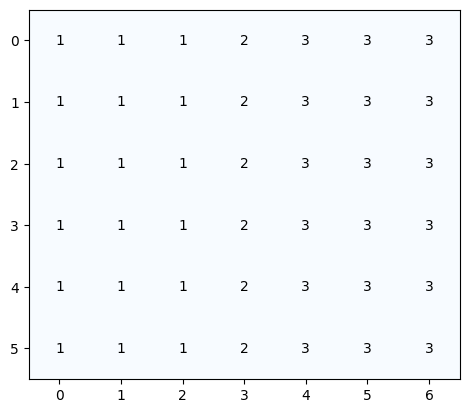

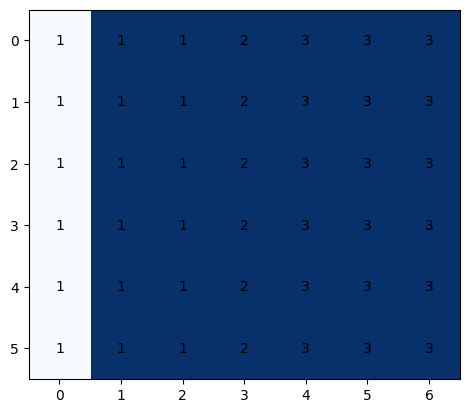

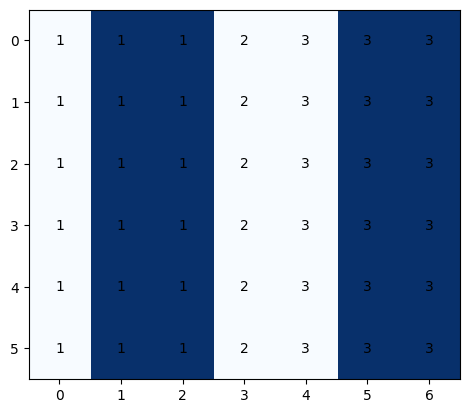

In [21]:
node_vals = []

# activate no nodes 
node_vals.append(np.zeros((6,7)))

# activate single node in one subgraph
node_vals.append(np.zeros((6,7))); node_vals[-1][:, 0] = -1

# activate single node in each subgraph
node_vals.append(np.zeros((6,7))); node_vals[-1][:, 0] = -1
node_vals[-1][:,3] = -1; node_vals[-1][:,4] = -1

test_ws_seg_temporal(graph_disc, node_vals)